# Chargement des données

Nous avons hébergé notre base de donnée sur un repo Github.

Nous allons charger toutes les données avant de les séparer entre un ensemble de test et d'apprentissage (pour l'ensemble de validation, on utilise le parametre de model.fit)

In [17]:
!git clone https://github.com/GauBen/aibum.git
path = "./aibum/DB_example/"

fatal: destination path 'aibum' already exists and is not an empty directory.


Une fois les données téléchargées localement, on peut maintenant charger les images et les labels. 

In [11]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat

def load_all_data(data_path, classes, image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + classes[idx_class]))
        num_images += len(dirs)
    
        # Chargement des images, 
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + classes[idx_class] + '/' + item)
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

Chargement des données 


In [25]:
labels = ['Electronic', 'Hip Hop', 'Jazz', 'Reggae', 'Rock']

all_x, all_y = load_all_data(path, labels, image_size=64)
print(all_x.shape, all_y.shape)

(5000, 64, 64, 3) (5000, 1)


Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

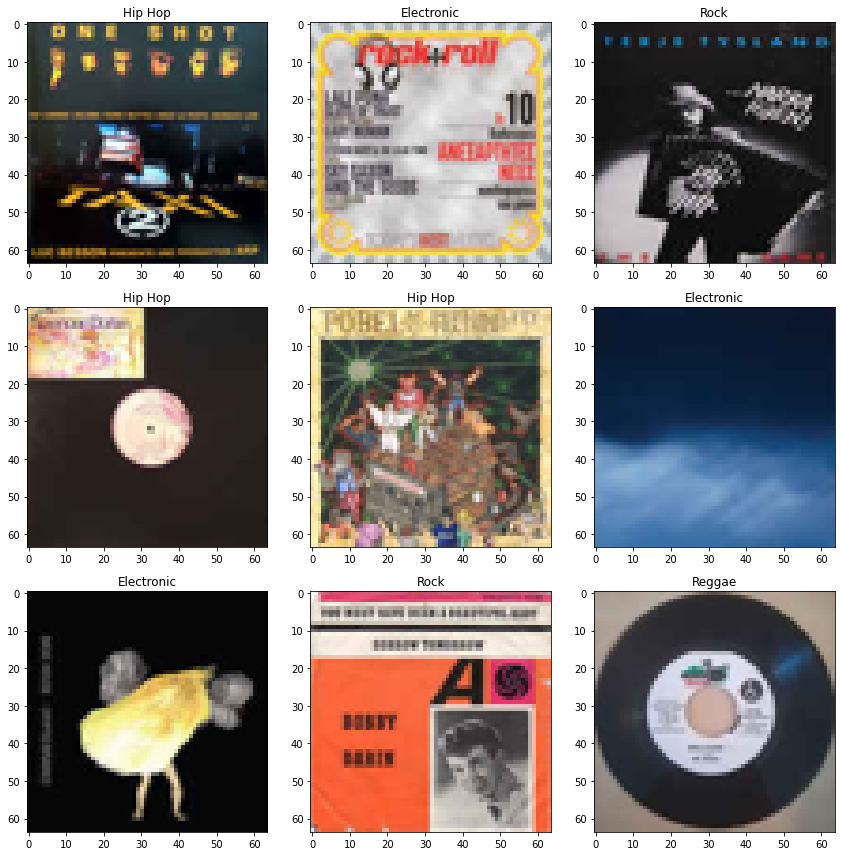

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(len(all_x))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = all_x[shuffle_indices[i]]
    plt.title(labels[int(all_y[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

# Separation ensemble Test / Apprentissage


In [37]:
from sklearn.model_selection import train_test_split

# Split for train & test
x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.20, random_state=33)
print("Taille de l'ensemble total : ", len(all_x))
print("Taille de l'ensemble d'apprentissage : ", len(x_train))

Taille de l'ensemble total :  5000
Taille de l'ensemble d'apprentissage :  4000
